In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()
print(trainX.shape)

(60000, 28, 28)


In [3]:
print(trainX.shape)

(60000, 28, 28)


8


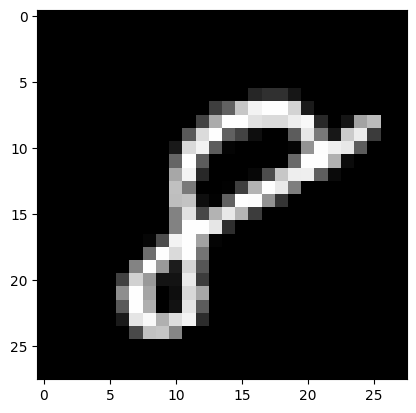

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [4]:
from matplotlib import pyplot as plt

%matplotlib inline
print(trainY[-1])
plt.imshow(trainX[-1], cmap = 'gray')
plt.show()
trainY = to_categorical(trainY)
print(trainY[-1])

In [5]:
def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [6]:
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

In [7]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = Adam(learning_rate=0.01)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [8]:
def evaluate_model(dataX, dataY, n_folds=5):
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	flag = 0
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		if flag == 0:
			model.summary()
		flag = 1
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		model.fit(trainX, trainY, epochs=1, batch_size=32, validation_data=(testX, testY), verbose=1)
		_, acc = model.evaluate(testX, testY, verbose=1)
		print('> %.3f' % (acc * 100.0))

In [9]:
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	evaluate_model(trainX, trainY)

In [10]:
run_test_harness()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
from keras.callbacks import ModelCheckpoint

In [12]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

In [13]:
from types import prepare_class
model = define_model()
trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
history = model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/10
1500/1500 [==============================] - ETA: 0s - loss: 0.1845 - accuracy: 0.9457
Epoch 1: val_accuracy improved from -inf to 0.96500, saving model to best_model.h5
1500/1500 [==============================] - 69s 45ms/step - loss: 0.1845 - accuracy: 0.9457 - val_loss: 0.1151 - val_accuracy: 0.9650
Epoch 2/10
   3/1500 [..............................] - ETA: 56s - loss: 0.1267 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1499/1500 [============================>.] - ETA: 0s - loss: 0.1093 - accuracy: 0.9694
Epoch 2: val_accuracy improved from 0.96500 to 0.96908, saving model to best_model.h5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.1092 - accuracy: 0.9694 - val_loss: 0.1039 - val_accuracy: 0.9691
Epoch 3/10
1499/1500 [============================>.] - ETA: 0s - loss: 0.0981 - accuracy: 0.9724
Epoch 3: val_accuracy did not improve from 0.96908
1500/1500 [==============================] - 70s 46ms/step - loss: 0.0981 - accuracy: 0.9724 - val_loss: 0.1315 - val_accuracy: 0.9665
Epoch 4/10
1500/1500 [==============================] - ETA: 0s - loss: 0.0974 - accuracy: 0.9737
Epoch 4: val_accuracy improved from 0.96908 to 0.97575, saving model to best_model.h5
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0974 - accuracy: 0.9737 - val_loss: 0.0884 - val_accuracy: 0.9758
Epoch 5/10
1500/1500 [==============================] - ETA: 0s - loss: 0.0978 - accuracy

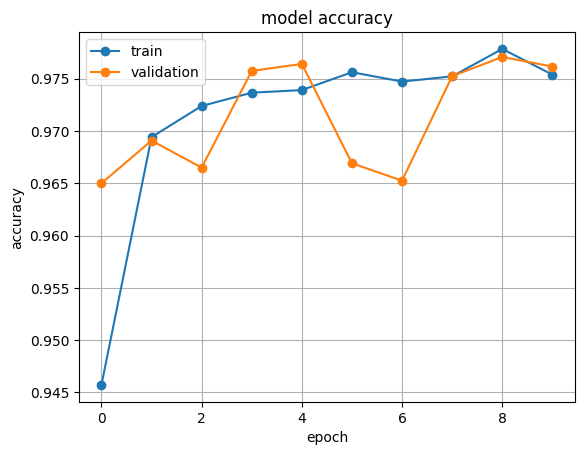

<Figure size 6000x20000 with 0 Axes>

In [14]:
plt.rcParams.update({'font.size': 10})
plt.plot(history.history['accuracy'], '-o')
plt.plot(history.history['val_accuracy'], '-o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train','validation'], loc='best')
plt.figure(figsize=(60,200))
plt.show()

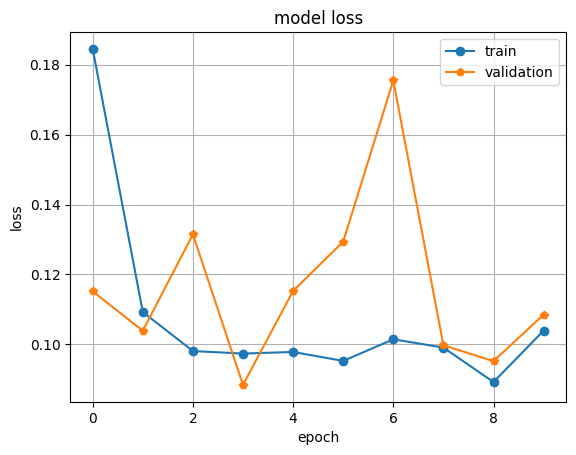

In [15]:
plt.plot(history.history['loss'], '-o')
plt.plot(history.history['val_loss'], '-p')
plt.title('model loss')
plt.ylabel('loss')
plt.grid(True)
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [16]:
model = load_model("best_model.h5")

In [17]:
import numpy as np
Y_pred = model.predict(testX)
Y_pred = np.argmax(Y_pred, axis=1)

313/313 [==============================] - 5s 17ms/step


In [18]:
Y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
testY = np.argmax(testY, axis=1)

In [20]:
from sklearn.metrics import accuracy_score
print(f"The accuracy is : { accuracy_score(testY,Y_pred)*100}%")

The accuracy is : 97.44%


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [23]:
print(classification_report(testY, Y_pred, target_names=labels))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<Axes: >

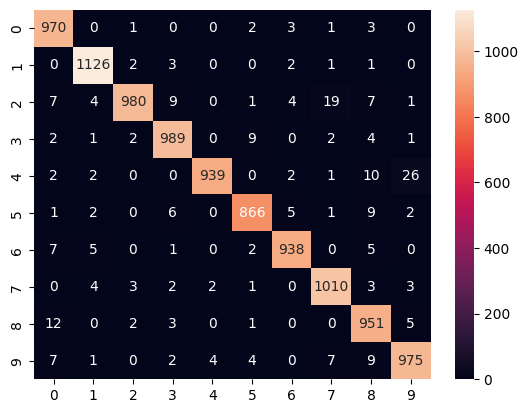

In [24]:
import seaborn as sns
cm = confusion_matrix(testY, Y_pred)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='g')